# Biopython projects

In the next days I will be learning some Biopython useful features to perform different bioinformatics-related tasks. If you want to learn more, I encourage you to read Biopython **Tutorial and Cookbook** written by Jeff Chang, Brad Chapman, Iddo Friedberg, Thomas Hamelryck,
Michiel de Hoon, Peter Cock, Tiago Antao, Eric Talevich and Bartek Wilczynski (december 2019). I have learnt most of the things I show you in this project by reading this book.

In [1]:
import Bio
print(Bio.__version__)

## Transient Receptor Potential Ankyrin subtype 1 (TRPA1)

I think the simplest example of a Biopython functionality is to count the amino-acid frequencies in a protein, like TRPA1. 

In short, TRPA1 is a polymodal sensor that detects danger signals. It is a promiscuous chemical nocisensor that seems to be involved in noxious cold and mechanical stimuli sensation, itching and another physiological processes. It is an ion channel which belongs to the TRP channels family, it permeates cations in a non-selective fashion, and is associated with some pathological states such as chemotherapy-induced neuropathy (by oxaliplatin and paclitaxel), osteoarthritis and postoperative pain.

## Amino-acidic composition in a protein

Well, we can easily extract its amino-acid composition easily:

In [2]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
import requests

# We get the fasta sequence from Uniprot (Uniprot ID for TRPA1 is 75762)
url="https://www.uniprot.org/uniprot/O75762.fasta"
TRPA1_fasta = requests.get(url, headers={'Accept-Encoding': 'br'}).text.strip()
print("This is the Uniprot fasta file for TRPA1:\n{}\n".format(TRPA1_fasta))

# We split the entry by newline symbols
TRPA1_split = TRPA1_fasta.split("\n")

# We discard the header and join TRPA1 sequence in an only string
TRPA1_seq = "".join(TRPA1_split[1:])
print("This is TRPA1 sequence:\n{}".format(TRPA1_seq))


TRPA1 = Seq(TRPA1_seq, IUPAC.protein)

print("\nNow let's analyze TRPA1 amino-acid composition.")
for aminoacid in "ACDEFGHIKLMNPQRSTVWY":
    print("There is {}% of {} in TRPA1 sequence.".format(
        round(100*TRPA1.count(aminoacid)/len(TRPA1), 1), aminoacid))

This is the Uniprot fasta file for TRPA1:
>sp|O75762|TRPA1_HUMAN Transient receptor potential cation channel subfamily A member 1 OS=Homo sapiens OX=9606 GN=TRPA1 PE=1 SV=3
MKRSLRKMWRPGEKKEPQGVVYEDVPDDTEDFKESLKVVFEGSAYGLQNFNKQKKLKRCD
DMDTFFLHYAAAEGQIELMEKITRDSSLEVLHEMDDYGNTPLHCAVEKNQIESVKFLLSR
GANPNLRNFNMMAPLHIAVQGMNNEVMKVLLEHRTIDVNLEGENGNTAVIIACTTNNSEA
LQILLKKGAKPCKSNKWGCFPIHQAAFSGSKECMEIILRFGEEHGYSRQLHINFMNNGKA
TPLHLAVQNGDLEMIKMCLDNGAQIDPVEKGRCTAIHFAATQGATEIVKLMISSYSGSVD
IVNTTDGCHETMLHRASLFDHHELADYLISVGADINKIDSEGRSPLILATASASWNIVNL
LLSKGAQVDIKDNFGRNFLHLTVQQPYGLKNLRPEFMQMQQIKELVMDEDNDGCTPLHYA
CRQGGPGSVNNLLGFNVSIHSKSKDKKSPLHFAASYGRINTCQRLLQDISDTRLLNEGDL
HGMTPLHLAAKNGHDKVVQLLLKKGALFLSDHNGWTALHHASMGGYTQTMKVILDTNLKC
TDRLDEDGNTALHFAAREGHAKAVALLLSHNADIVLNKQQASFLHLALHNKRKEVVLTII
RSKRWDECLKIFSHNSPGNKCPITEMIEYLPECMKVLLDFCMLHSTEDKSCRDYYIEYNF
KYLQCPLEFTKKTPTQDVIYEPLTALNAMVQNNRIELLNHPVCKEYLLMKWLAYGFRAHM
MNLGSYCLGLIPMTILVVNIKPGMAFNSTGIINETSDHSEILDTTNSYLIKTCMILVFLS
SIFGYCKEAGQIFQQKRNYFMDISNVLEWIIYTT

We see that the most abundant amino-acids are leucin and isoleucin (around 20% of TRPA1 amino-acids combined). The abundance of this two non-polar amino-acids makes sense, as TRPA1 is a transmembrane channel so it has a large transmembrane region and the inner part of the plasma membrane is hydrophobic.

Besides, we can also count TRPA1 composition discriminating between hydrophobic, polar, negatively and positively charged amino acids:

In [3]:
hydrophobic = polar = negative = positive = 0

for aminoacid in "ACDEFGHIKLMNPQRSTVWY":
    if aminoacid in "AFGILMPVW":
        hydrophobic += round(100*TRPA1.count(aminoacid)/len(TRPA1), 1)
    elif aminoacid in "CNQSTY":
        polar += round(100*TRPA1.count(aminoacid)/len(TRPA1), 1)
    elif aminoacid in "HKR":
        positive += round(100*TRPA1.count(aminoacid)/len(TRPA1), 1)
    elif aminoacid in "DE":
        negative += round(100*TRPA1.count(aminoacid)/len(TRPA1), 1)

print("There is {}% hydrophobic, {}% polar, {}% positively-charged and {}% \
negatively-charged amino-acids".format(hydrophobic, polar, positive, negative))

There is 48.8% hydrophobic, 25.9% polar, 14.3% positively-charged and 11.1% negatively-charged amino-acids


It is clear that the vast majority of amino-acids in this protein are hydrophobic.

This simple task could have been easily done with base Python, but I just wanted to practice a little with this `Bio.Seq.Seq` object before moving to some more complex projects.

## Analysis of amino-acids nature along protein sequence

I am thinking about other functionality associated to the previous block (not very related to Biopython per se, but anyway). Maybe it would be interesting to analyze amino-acidic nature (polar or non-polar) along a protein sequence, to predict the presence of transmembrane regions or extracelular loops of a transmembrane channel like TRPA1.

In the next piece of code, I will label all 20-amino-acid windows with a value between 0 (when all 10 amino-acids are non-polar) and 1 (all hydrophilic amino-acids), and then I will plot these values in a graph using matplotlib. Each window is associated with the amino-acid position present in the center of the window.

Text(0.5, 0, 'Position in the sequence')

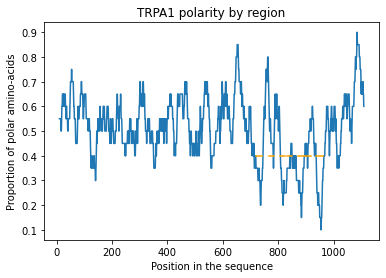

In [4]:
import matplotlib.pyplot as plt

window_length = 20
polarity = list()
center = list()

for i in range(len(TRPA1)- (window_length-1)):
    ending_aa = i + window_length
    subseq= TRPA1[i:ending_aa]
    polar = sum(map(subseq.count, ['S','T','Y','C','N','Q','H','K','R','D','E']))
    
    polarity.append(polar/window_length)
    center.append(int((ending_aa+i)/2))
    
plt.plot(center, polarity)
# TRPA1 transmembrane domains predicted by Pfam
plt.plot([720, 740], [0.4,0.4], color = "orange")
plt.plot([768, 786], [0.4,0.4], color = "orange")
plt.plot([806, 824], [0.4,0.4], color = "orange")
plt.plot([830, 850], [0.4,0.4], color = "orange")
plt.plot([870, 892], [0.4,0.4], color = "orange")
plt.plot([898, 918], [0.4,0.4], color = "orange")
plt.plot([938, 961], [0.4,0.4], color = "orange")

plt.title("TRPA1 polarity by region")
plt.ylabel("Proportion of polar amino-acids")
plt.xlabel("Position in the sequence")
    

In this plot, all proportions of polar amino-acids appear in blue. In orange, it is shown the positions of the transmembrane domains predicted by Pfam. Although there is a certain amount of noise in this plot, transmembrane domains have the lowest polarity values in TRPA1 sequence. 

This transmembrane domain prediction made by taking into account polarity of amino-acids in each window might be improved by taking into account also the probability of appearence in a transmembrane domain for each amino-acid. Maybe some supervised machine learning method could help, and this will be explored in the future.